In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
p1 = '/content/drive/MyDrive/Colab Notebooks/MVT/Mobile.csv'
df = pd.read_csv(p1)

Mounted at /content/drive


In [3]:
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [4]:
df.describe()

,Battery Capacity (mAh)
count,407.000000
mean,4676.476658
std,797.193713
min,1821.000000
25%,4300.000000
50%,5000.000000
75%,5000.000000
max,7000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [6]:
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [7]:
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

##Data Preparation
Data preparation follows a series of steps that starts with collecting the right data, followed by cleaning, labeling, and then validation and visualization.

In [8]:
np.array(df["Screen Size (inches)"])

array(['6.1', '6.8', '6.7', '6.67', '6.4', '6.1', '6.7', '6.67', '6.55',
       '6.78', '6.43', '6.5', '6.62', '5.4', '6.7', '6.55', '6.2', '6.51',
       '6.5', '6.43', '6.5', '6.6', '6.5', '6.55', '6.67', '6.1', '6.5',
       '6.5', '6.51', '6.5', '6.7', '6.5', '4.7', '6.5', '6.58', '6.5',
       '6.4', '6.43', '6.5', '6.1', '6.52', '6.5', '6.4', '6.43', '6.67',
       '5.4', '6.44', '6.5', '6.5', '6.52', '6.53', '6.5', '6.51', '6.5',
       '6.5', '6.51', '6.53', '6.7', '6.58', '6.7', '6.55', '6.5', '4.7',
       '6.58', '6.5', '6.5', '6.43', '6.43', '6.1', '6.51', '6.5', '6.6',
       '6.43', '6.55', '6.1', '6.56', '6.5', '6.1', '6.2', '6.43', '6.4',
       '6.67', '6.43', '6.78', '6.55', '6.7', '6.67', '6.1', '6.8 + 3.9',
       '6.67', '4.5', '6.7', '6.67', '6.5', '6.43', '6.58', '6.8', '6.39',
       '6.7', '5.9', '4.5', '5.5', '6.7', '6.7', '6.81', '6.52', '6.51',
       '6.5', '6.5', '6.5', '6.5', '6.5', '6.78', '6.8', '5.99', '6.55',
       '6.5', '6.5', '6.5', '6.5', '6.5', 

In [9]:
df["Price ($)"]=df["Price ($)"].str.extract('(\d+)', expand=False)


In [10]:
df["Price ($)"]

0       999
1      1199
2       899
3       279
4       799
       ... 
402    1049
403     349
404    1099
405     429
406     649
Name: Price ($), Length: 407, dtype: object

In [11]:
df["Price ($)"]=df["Price ($)"].astype(int)

In [12]:
df["RAM "]=df["RAM "].str.replace("GB","")
df["RAM "]=df["RAM "].astype(int)

In [13]:
df["Storage "]=df["Storage "].str.replace("GB","")
df["Storage "]=df["Storage "].astype(int)

In [14]:
df['n_cameras'] = df['Camera (MP)'].str.count('\\+') + 1

In [15]:
res1 = []
res2 = []
res3 = []
res4 = []
for x in df['Camera (MP)']:
    resolutions = x.split('+')
    tam = len(resolutions)

    if tam == 1:
        res1.append(resolutions[0])
        res2.append('0')
        res3.append('0')
        res4.append('0')

    if tam == 2:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append('0')
        res4.append('0')

    if tam == 3:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append('0')

    if tam == 4:
        res1.append(resolutions[0])
        res2.append(resolutions[1])
        res3.append(resolutions[2])
        res4.append(resolutions[3])

df['res1'] = res1
df['res2'] = res2
df['res3'] = res3
df['res4'] = res4

df= df.drop(columns='Camera (MP)')
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4
0,Apple,iPhone 13 Pro,128,6,6.1,3095,999,3,12,12,12,0
1,Samsung,Galaxy S21 Ultra,256,12,6.8,5000,1199,4,108,10,10,12
2,OnePlus,9 Pro,128,8,6.7,4500,899,4,48,50,8,2
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,5020,279,4,64,8,5,2
4,Google,Pixel 6,128,8,6.4,4614,799,2,50,12.2,0,0


In [16]:
df['Screen Size (inches)'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')

In [17]:
cem1 = []
cem2 = []
cem3 = []
for x in df['Screen Size (inches)']:
    resolutions = x.split('.')
    tam = len(resolutions)

    if tam == 1:
        cem1.append(resolutions[0])
        cem2.append('0')
        cem3.append('0')

    if tam == 2:
        cem1.append(resolutions[0])
        cem2.append(resolutions[1])
        cem3.append('0')

    if tam == 3:
        cem1.append(resolutions[0])
        cem2.append(resolutions[1])
        cem3.append(resolutions[2])


df['cem1'] = cem1
df['cem2'] = cem2
df['cem3'] = cem3

df= df.drop(columns='Screen Size (inches)')

In [18]:
df["screen"] = df['cem1']+"."+ df["cem2"]
df=df.drop(["cem1","cem2","cem3"],axis=1)
df

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
0,Apple,iPhone 13 Pro,128,6,3095,999,3,12,12,12,0,6.1
1,Samsung,Galaxy S21 Ultra,256,12,5000,1199,4,108,10,10,12,6.8
2,OnePlus,9 Pro,128,8,4500,899,4,48,50,8,2,6.7
3,Xiaomi,Redmi Note 10 Pro,128,6,5020,279,4,64,8,5,2,6.67
4,Google,Pixel 6,128,8,4614,799,2,50,12.2,0,0,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,4300,1049,3,12,64,12,0,6.7
403,Xiaomi,Mi 10 Lite 5G,128,6,4160,349,4,48,8,2,2,6.57
404,Apple,iPhone 12 Pro Max,128,6,3687,1099,3,12,12,12,0,6.7
405,Oppo,Reno3,128,8,4025,429,4,48,13,8,2,6.4


In [19]:
df["screen"]=df["screen"].astype(float)

In [20]:
df["res1"]=df["res1"].str.extract('(\d+)', expand=False)

In [21]:
df["res1"]=df["res1"].astype(int)

In [22]:
df["res2"]=df["res2"].str.extract('(\d+)', expand=False)

In [23]:
df["res2"]=df["res2"].astype(int)

In [24]:
df["res3"]=df["res3"].str.extract('(\d+)', expand=False)

In [25]:
df["res3"]=df["res3"].astype(int)

In [26]:
np.array(df["res4"])

array(['0', ' 12', ' 2', ' 2', '0', '0', '0', ' 2', ' 2', ' 8', '0', ' 5',
       '0', '0', ' 3', '0', '0', '0', '0', ' 2', ' 2', '0', '0', '0',
       ' 2', '0', '0', '0', '0', '0', ' 5', ' 2', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', ' 2', ' 2', '0', '0', '0', '0', ' 2', '0',
       ' 2', '0', '0', '0', ' 5', '0', ' 2', '0', '0', ' 5', ' 2', '0',
       '0', '0', ' 2', ' 5', ' 2', ' 2', '0', '0', '0', '0', ' 2', '0',
       '0', '0', '0', '0', '0', '0', '0', ' 2MP', '0', ' 8MP', ' 2MP',
       '0', '0', '0', '0', '0', '0', ' 5MP', ' 2MP', '0', ' 2MP', '0',
       '0', '0', ' 2MP', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', ' 2MP', '0', ' 2MP', '0', '0', '0',
       ' 2MP', '0', '0', '0', ' 2MP', '0', '0', '0', ' 5MP', ' 2MP', '0',
       '0', ' 5MP', '0', '0', '0', '0', '0', '0', ' 2MP', '0', '0', '0',
       '0', ' 2MP', '0', '0', ' 10MP', '0', '0', '0', '0', '0', ' 2MP',
       '0', '0', '0', '0', '0', '0', '0', '0', ' 2MP

In [27]:
df["res4"]=df["res4"].str.extract('(\d+)', expand=False)

In [28]:
df['res4'].isnull().sum()

1

In [29]:
df['res4'] = df['res4'].fillna(0)

In [30]:
df['res4'].isnull().sum()

0

In [31]:
df['res4'] = df['res4'].astype(int)

In [32]:
df.head()

,Brand,Model,Storage,RAM,Battery Capacity (mAh),Price ($),n_cameras,res1,res2,res3,res4,screen
0,Apple,iPhone 13 Pro,128,6,3095,999,3,12,12,12,0,6.10
1,Samsung,Galaxy S21 Ultra,256,12,5000,1199,4,108,10,10,12,6.80
2,OnePlus,9 Pro,128,8,4500,899,4,48,50,8,2,6.70
3,Xiaomi,Redmi Note 10 Pro,128,6,5020,279,4,64,8,5,2,6.67
4,Google,Pixel 6,128,8,4614,799,2,50,12,0,0,6.40


##Univariate Analysis

In [33]:
df['Battery Capacity (mAh)'].describe()

count     407.000000
mean     4676.476658
std       797.193713
min      1821.000000
25%      4300.000000
50%      5000.000000
75%      5000.000000
max      7000.000000
Name: Battery Capacity (mAh), dtype: float64

<Axes: ylabel='Frequency'>

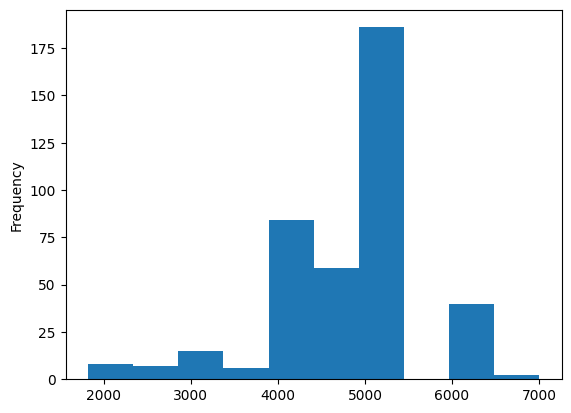

In [34]:
df['Battery Capacity (mAh)'].plot(kind="hist")

<Axes: >

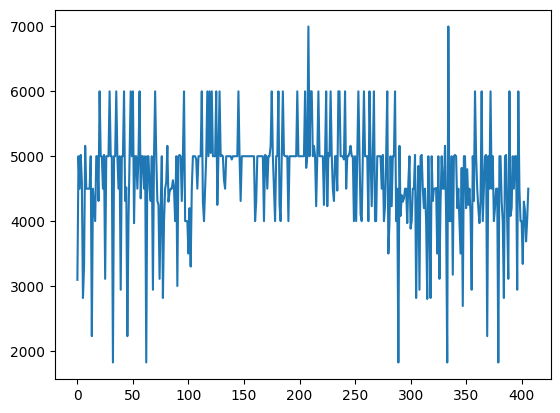

In [35]:
df['Battery Capacity (mAh)'].plot(kind="line")

{'whiskers': [<matplotlib.lines.Line2D at 0x7c0629811480>,
 'caps': [<matplotlib.lines.Line2D at 0x7c06298118a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c06298111e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c0629811de0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c0629812080>],
 'means': []}

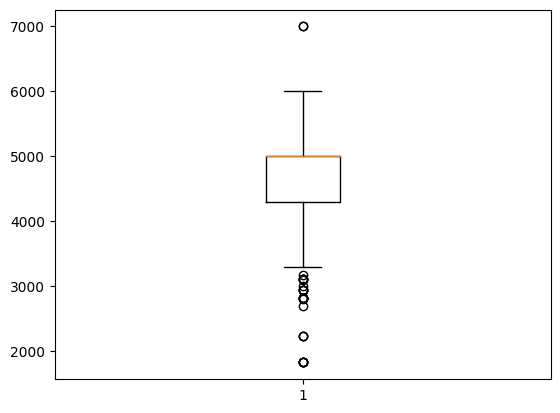

In [36]:
plt.boxplot(df['Battery Capacity (mAh)'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7c062986fdf0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7c062986fd90>,
 'cmins': <matplotlib.collections.LineCollection at 0x7c06286ac400>,
 'cbars': <matplotlib.collections.LineCollection at 0x7c06286ac760>}

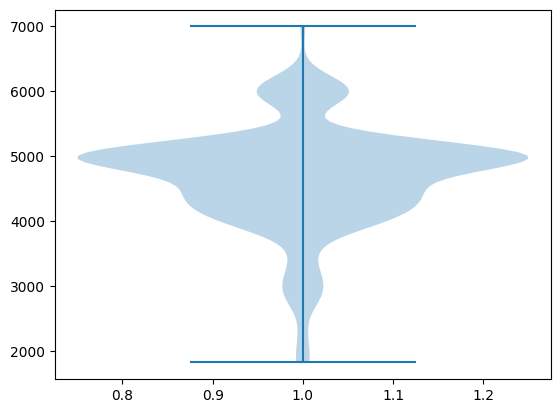

In [38]:
plt.violinplot(df['Battery Capacity (mAh)'])

<Axes: xlabel='Price ($)', ylabel='count'>

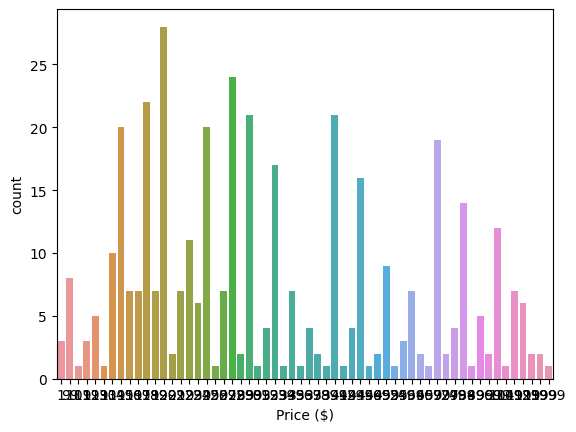

In [39]:
sns.countplot(x='Price ($)',data=df)

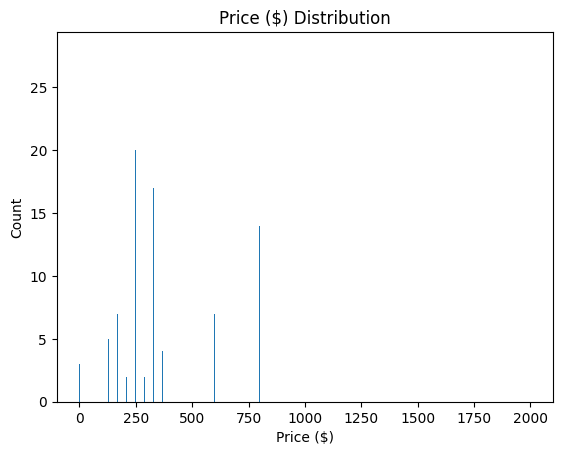

In [40]:
phone_counts = df['Price ($)'].value_counts()
plt.bar(phone_counts.index, phone_counts.values)
plt.title("Price ($) Distribution")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

Text(0.5, 1.0, 'Brand Distribution')

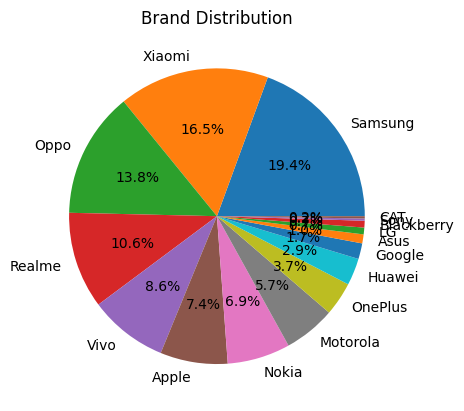

In [42]:
dependents = df['Brand'].value_counts()
plt.pie(dependents.values, labels=dependents.index, autopct='%1.1f%%')
plt.title("Brand Distribution")

<ipython-input-44-576f466a8547>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price ($)'])


<Axes: xlabel='Price ($)', ylabel='Density'>

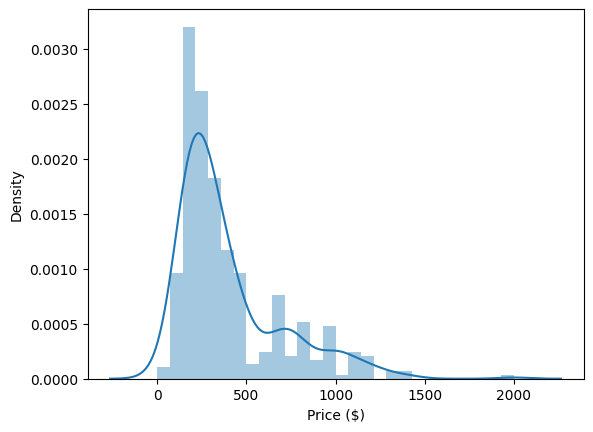

In [44]:
sns.distplot(df['Price ($)'])

<ipython-input-45-2b735d0b43dc>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price ($)'], shade=True, color="g")


<Axes: xlabel='Price ($)', ylabel='Density'>

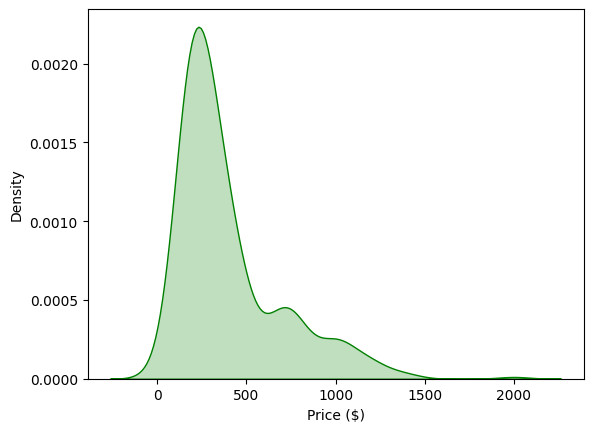

In [45]:
sns.kdeplot(df['Price ($)'], shade=True, color="g")

##Bivariate Analysis

<Axes: xlabel='Brand', ylabel='Price ($)'>

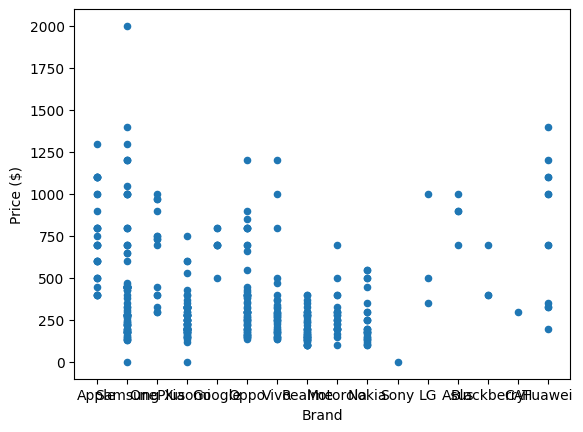

In [46]:
var = 'Brand'
data = pd.concat([df['Price ($)'], df[var]], axis=1)
data.plot.scatter(x=var, y='Price ($)')

Text(0.5, 0.98, 'Joint Plot of Brand and Price ($)')

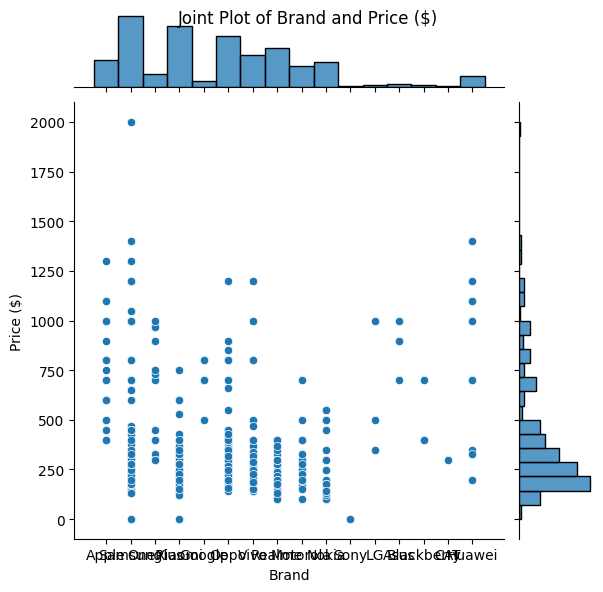

In [47]:
sns.jointplot(df,x="Brand",y="Price ($)",kind="scatter")
plt.suptitle("Joint Plot of Brand and Price ($)")

<Axes: xlabel='Price ($)', ylabel='count'>

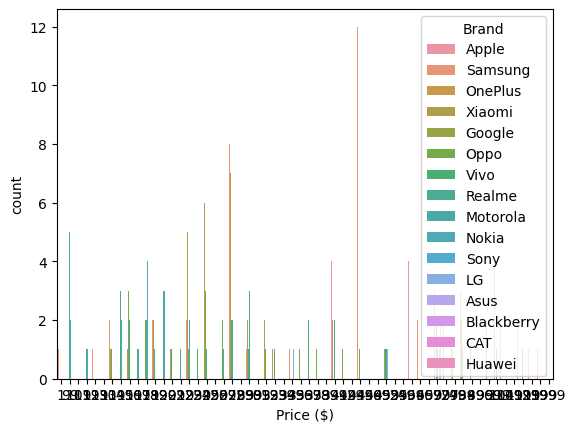

In [53]:
sns.countplot(df, x="Price ($)", hue="Brand")

In [41]:
df.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Battery Capacity (mAh)',
       'Price ($)', 'n_cameras', 'res1', 'res2', 'res3', 'res4', 'screen'],
      dtype='object')

<ipython-input-56-2ef00adffcee>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(df, x= "Price ($)", hue="Brand", kind="kde")
<ipython-input-56-2ef00adffcee>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(df, x= "Price ($)", hue="Brand", kind="kde")


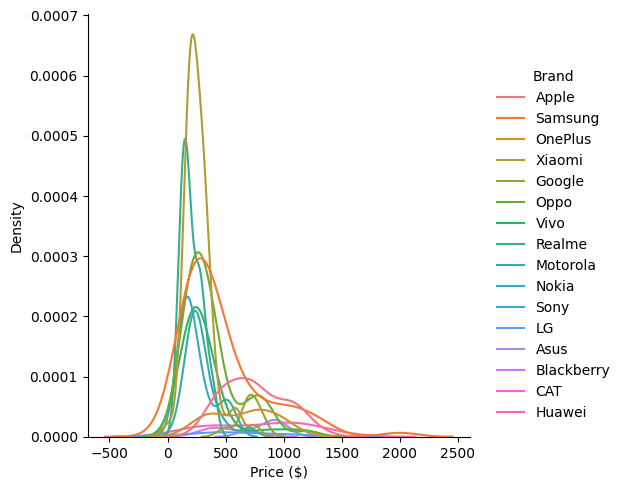

In [56]:
sns.displot(df, x= "Price ($)", hue="Brand", kind="kde")

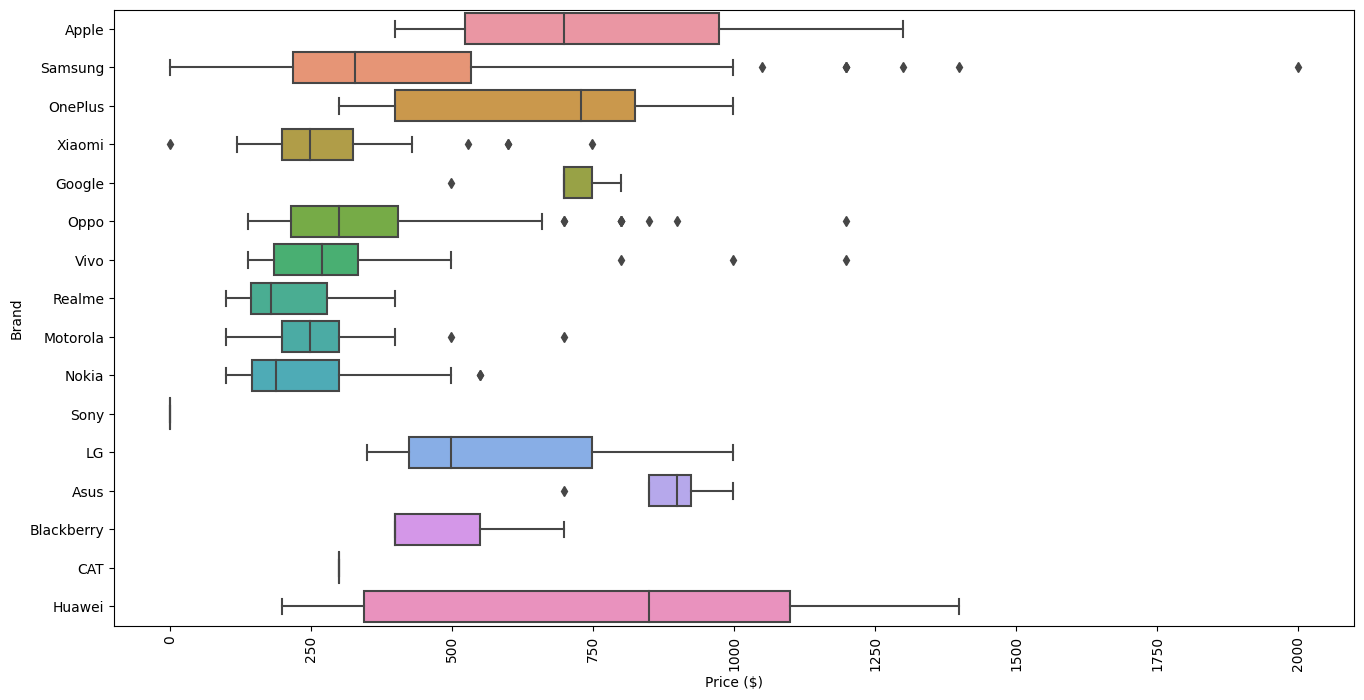

In [54]:
var = 'Price ($)'
data = pd.concat([df['Brand'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Brand", data=data)
plt.xticks(rotation=90);


##MultiVariate Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


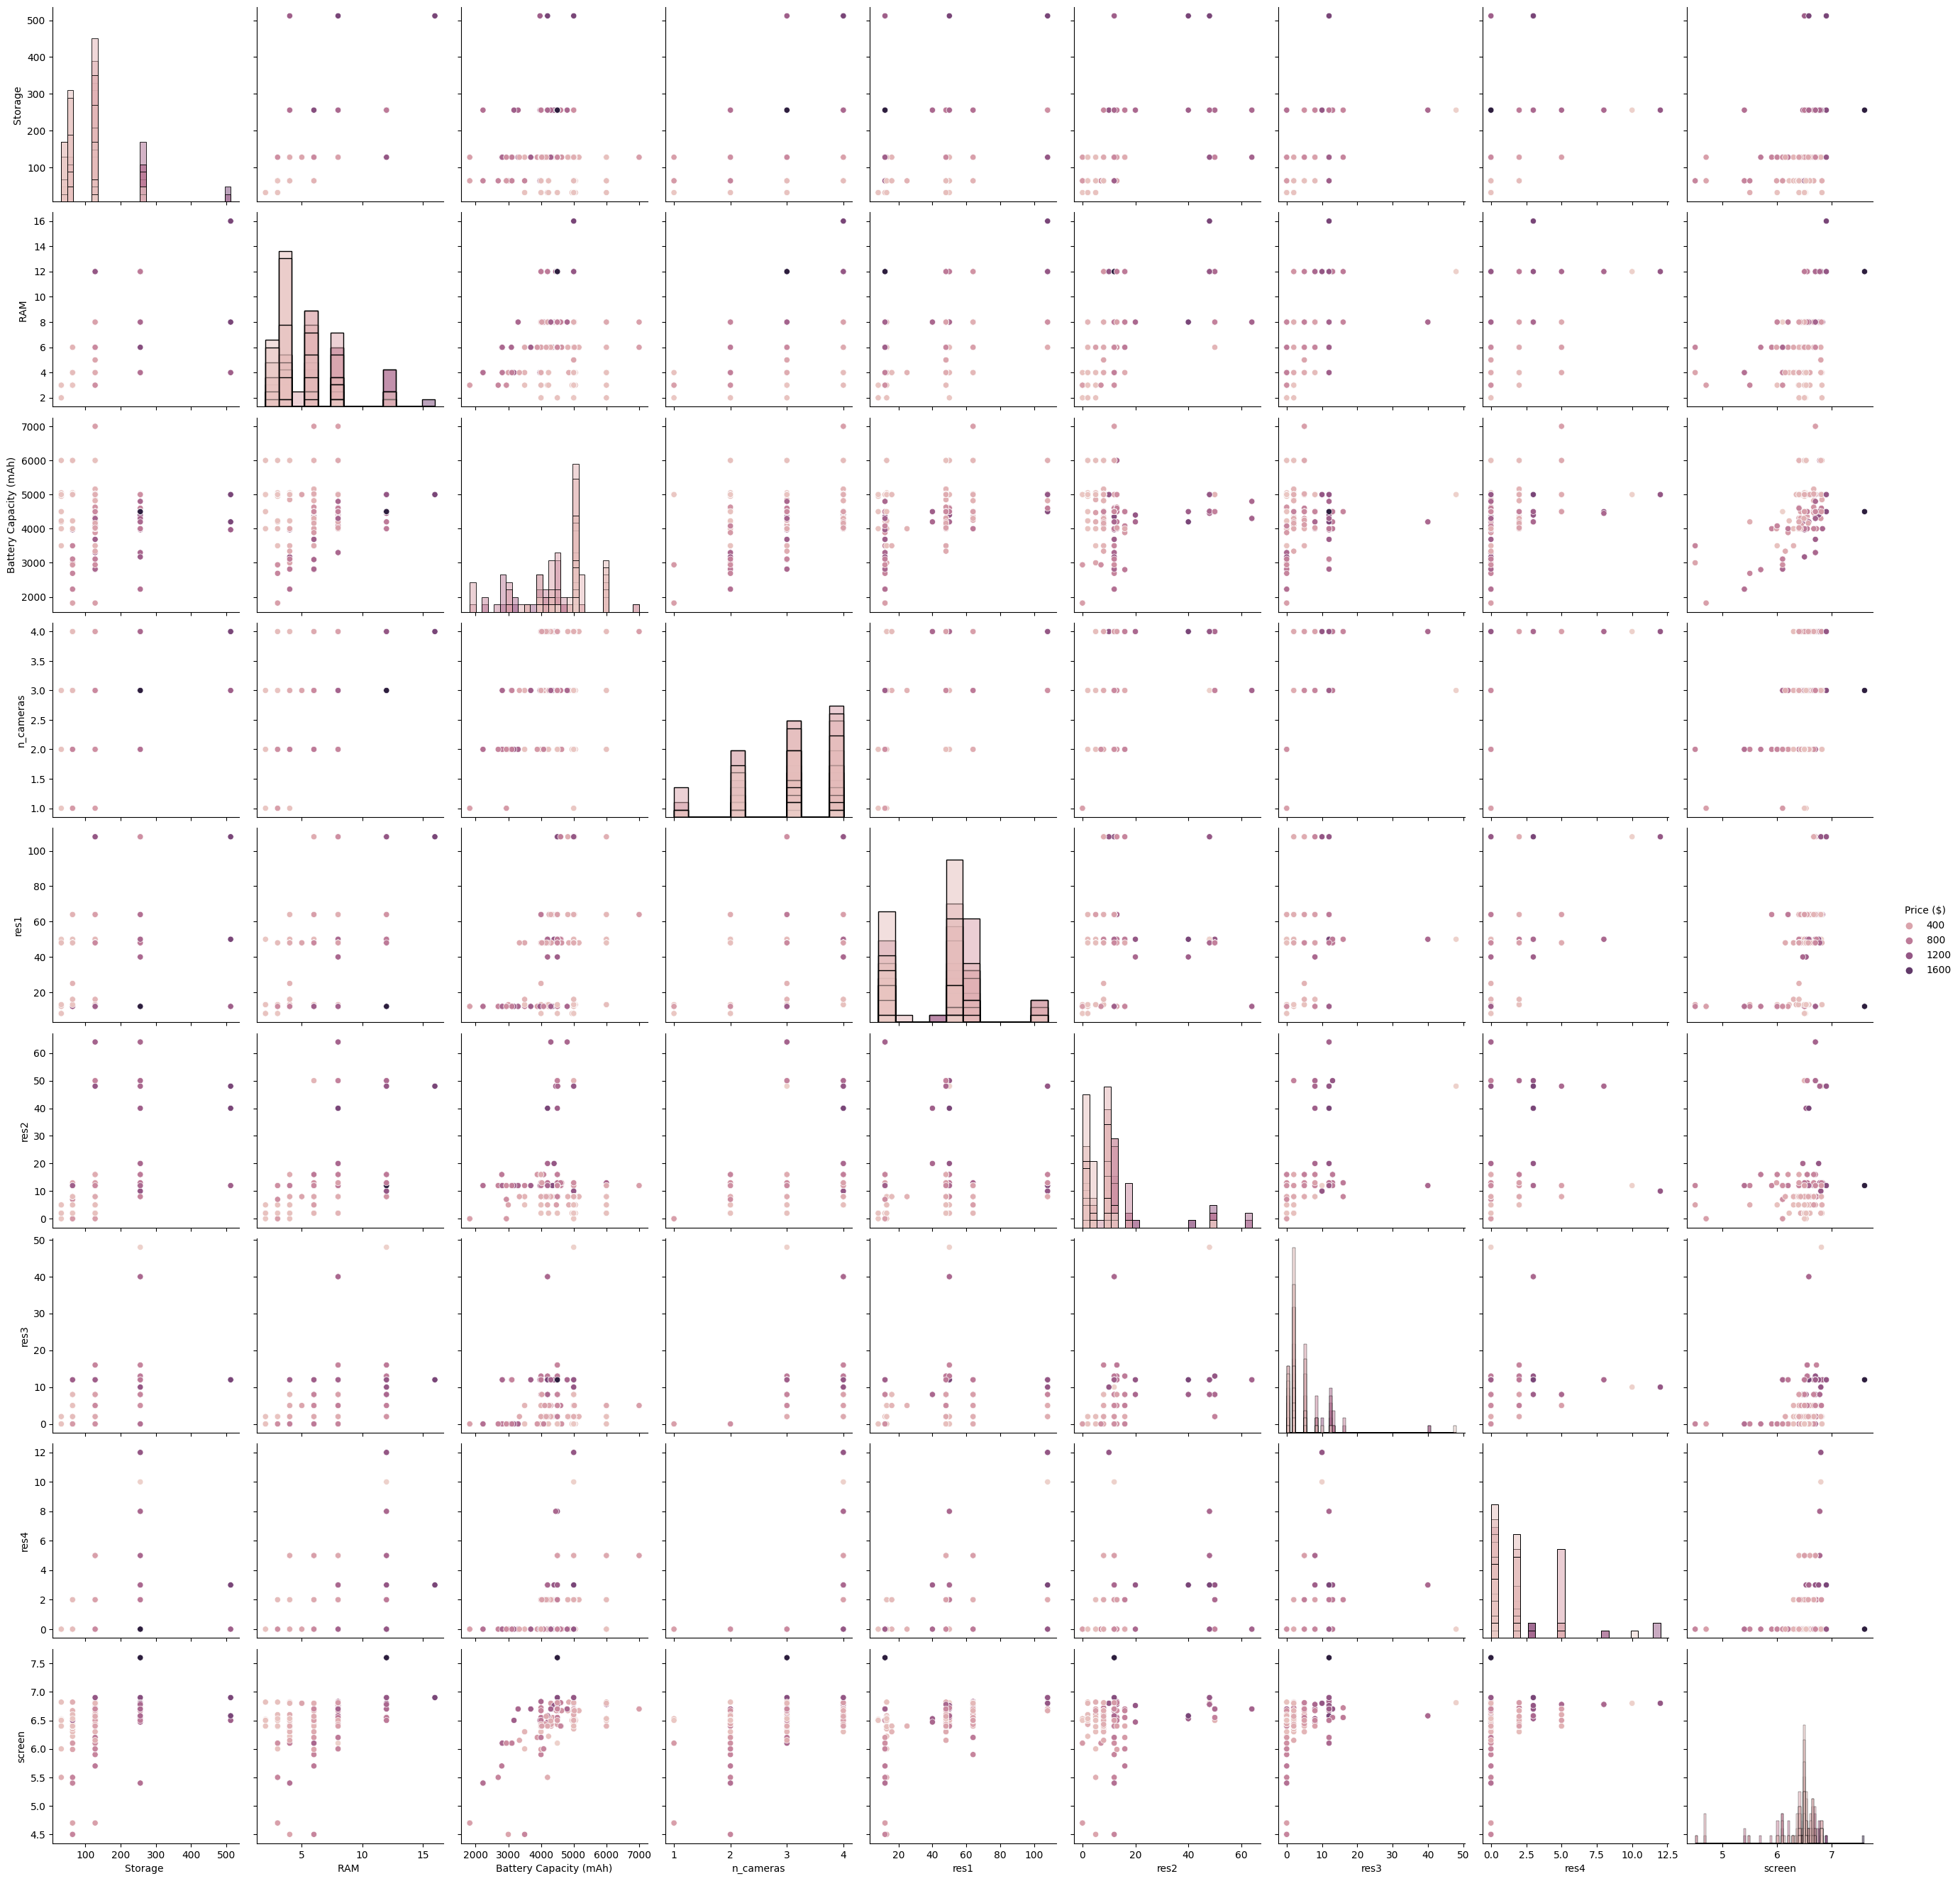

In [57]:
s=sns.pairplot(df,hue='Price ($)',size=3,diag_kind='hist')
s.savefig("output.png")

<ipython-input-58-6ad8df0ee135>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr(method='spearman')


<Axes: >

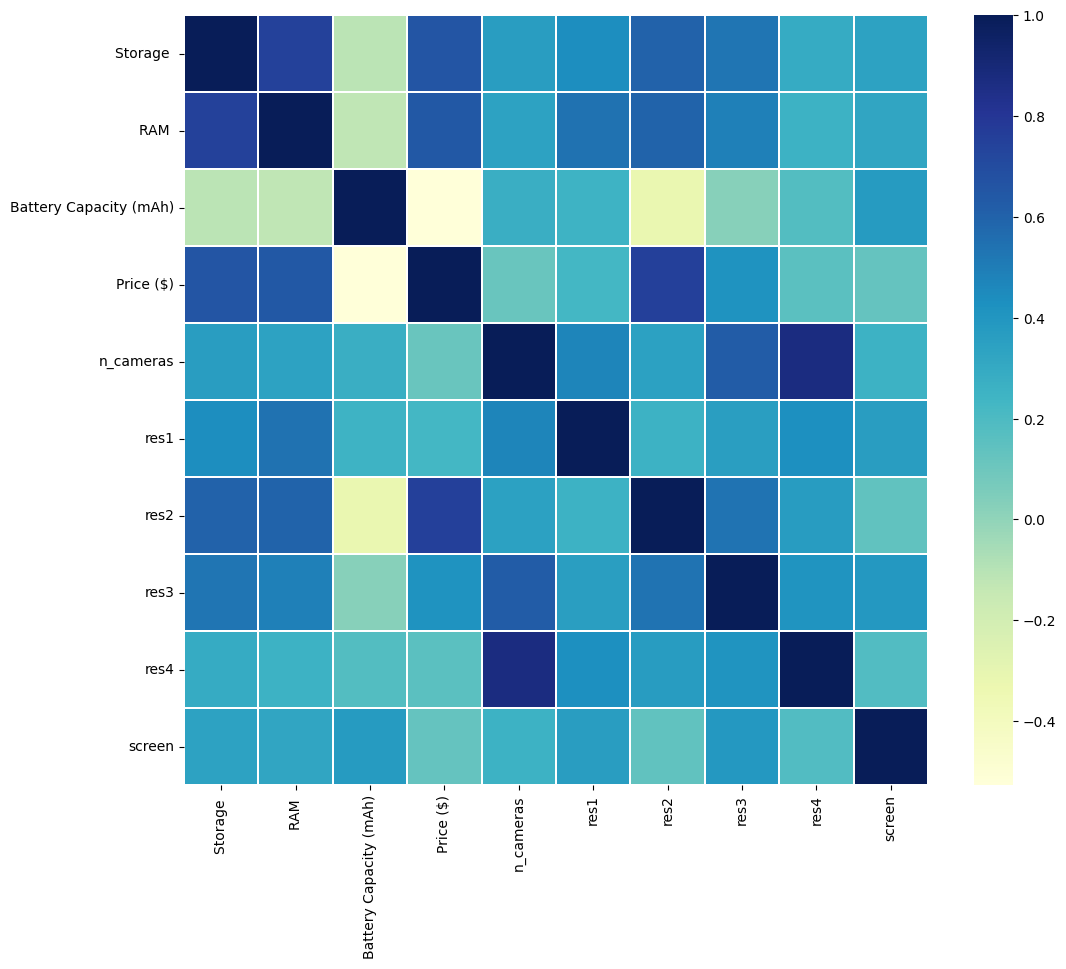

In [58]:
corrmat = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)